# FIT9136 Algorithms and programming foundations in Python 

# Week 8 Lab Activities: File Manipulation, Testing And Exception Handling, Python Library And Packages

Please place the following files under the same folder as this notebook:
- textfile.txt
- addresses.csv


## Part A. File Manipulation

### File Reading and Writing

Depending on the file type, we can use different functions or libraries to read from or write to a file.

#### 1. File in general

If the file content is just some random text which does not follow any specific formats, we can use the `open()` function to open the file: 
- in 'r'(read) mode and use `read()`/`readlines()`/`readline()` methods to read the file content.
- in 'w'(write) or 'a'(append) mode and use `write()` methods to write string to file.

In [1]:
# apart from the file name, we can also specify whether we want to read/write/append, and the decoder used when reading the file
?open

**[File Object methods](https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects)**

- `read()` : reads the whole file as a single string
- `readline()`: returns the next line in the file. First time caliing will return us the first line, second time calling will return us the line after, and so on.
- `readlines()`: returns a list of string, where each item in the list is a line in the file.
- `write()`: write a string to the file opened.

In [3]:
with open('textfile.txt') as f:
    print(repr(f.read()))

FileNotFoundError: ignored

In [ ]:
with open('textfile.txt') as f:
    line = f.readline()
    while line:
        print(repr(line))
        line = f.readline()

In [ ]:
with open('textfile.txt') as f:
    print(repr(f.readlines()))

In [ ]:
with open('newfile.txt', 'w') as f:
    f.write('this is a new file.')

In [ ]:
with open('newfile.txt', 'a') as f:
    f.write('\nthis is a line appended to the existing file.')

<font color='red'>**Task**</font>: Let's write a script that reads `textfile.txt`, extract every other line(The 1st, 3rd, 5th.. lines) and write those to a **new** file called `newfile.txt`.

In [ ]:
# Implement here

#### 2. Comma-Separated Values(CSV) File

CSV file can be read and written easily with the help of [**pandas**](https://pandas.pydata.org/docs/) library. We will explore the usage of pandas library further next week. 

***It is actually an ordinary text file that has a specific format.*** Each line of the file represents a row(a datum), and the columns are separated by commas. Let's have a look of `addresses.csv` file.

In [ ]:
with open('addresses.csv') as f:
    print(f.read())

We can see there are 6 data with 7 columns in the file. However, the column names, which normally are defined in the first line, are missing.

Below, let's see how we could use pandas to read csv files.

**I: Set up and import pandas**

In [ ]:
# uncomment the line below to install pandas if it is not already installed
#!pip install pandas

In [4]:
import pandas as pd # import pandas and set pd as its alias

**II: Read input file as [DataFrame](https://pandas.pydata.org/docs/reference/frame.html) object**

In [ ]:
# we can use read_csv method to create a pandas DataFrame from a csv file
?pd.read_csv

In [ ]:
df = pd.read_csv('addresses.csv', names=['firstname','lastname','street','suburb','state','postcode']) # a DataFrame is created from the csv file and stored as df

**III: Perform operations on the DataFrame(Will be further explored next week)**

In [ ]:
# we can inspect the DataFrame with head() method, which shows the first 5 rows of data
df.head()

In [ ]:
# "Generate descriptive statistics" for categorical and numerical features(https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)
# Implement here
stat_df = ?
stat_df

**IV: Export DataFrame to csv file**

In [ ]:
# exporting the statistics to csv file
stat_df.to_csv('addresses_stats.csv')

<font color='red'>**Task**</font>: Let's write a script that reads `textfile.txt` and create a csv file `spider_man.csv` with 2 columns: `name` and `category` to store the name of the video and whether it is TV or Film respectively. Below is what the output csv will look like:

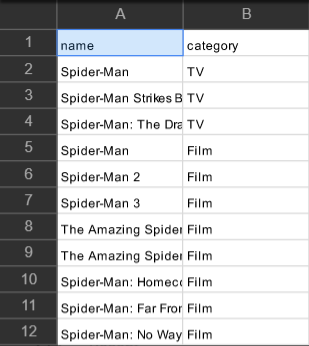

Hint: Do we need to use pandas in this task?

In [ ]:
# Implement here

## Part B Testing and Exception Handling

In this part, we will face your biggest fear: **ERROR**, or something more terrifying: **ERROR NOT FOUND**. 

First, we will identify *some* common errors. Then, we will discuss how we can fix and handle the errors when we are programming.

![](https://static.wikia.nocookie.net/harrypotter/images/d/d7/Snape_boggart.gif/revision/latest?cb=20140416074637)

### Activity 1: Get to know what you fear

1. Run the code cell
2. read the error message and identify the error type
3. fix them.

<font color='red'>**Case 1: check 1 + 2 is equal to 3**</font>

In [ ]:
1 + 2 = 3


SyntaxError: cannot assign to operator (<ipython-input-3-6053883bffe9>, line 1)

In [ ]:
1+ 2 == 3

True

<font color='red'>**Case 2: try to join the items in the list with comma**</font>

In [ ]:
print(','.join((['a','b','c','d']))

SyntaxError: unexpected EOF while parsing (<ipython-input-2-8bb44dc84877>, line 1)

In [ ]:
print(','.join(['abcd'])

SyntaxError: unexpected EOF while parsing (<ipython-input-6-d0dfef6f10ab>, line 1)



---



<font color='red'>**Case 3: printing 'a2'**</font>

In [ ]:
print('a' + 2)

TypeError: can only concatenate str (not "int") to str



---



In [ ]:
print('a'+'2')

a2


<font color='red'>**Case 4: printing 'I have an apple I have a pen Apple Pen'**</font>

In [ ]:
print(I, have, an, apple, I, have, a, pen, Apple, Pen)

NameError: name 'I' is not defined



---



In [ ]:
print('I, have, an, apple, I, have, a, pen, Apple, Pen')

I, have, an, apple, I, have, a, pen, Apple, Pen


<font color='red'>**Case 5: printing 5 / i, where i is from 5 to 0**</font>

In [ ]:
for i in range(5,-1,-1):
    print(5/i)

1.0
1.25
1.6666666666666667
2.5
5.0


ZeroDivisionError: division by zero



---



<font color='red'>**Case 6: trying to get the numerical representation of the character 'a'**</font>

In [ ]:
print(int('a'))

ValueError: invalid literal for int() with base 10: 'a'



---



<font color='red'>**Case 7: trying to print the last item of the_list**</font>

In [ ]:
the_list = [1,2,3]
print(the_list[3])



---



<font color='red'>**Case 8: trying to get the score of a student**</font>

In [ ]:
class Student:
    def __init__(self, score):
        self.mark = score

stu = Student(80)
print(stu.score)



---


<font color='brown'>**There are many more errors that could exist in our scripts. You can explore further by reading the [documentation](https://docs.python.org/3/library/exceptions.html).**</font>

### Activity 2: Exception handling

In this activity, we will reuse some parts of the Contact and PhoneBook classes from week 7.

#### 2A. What could possibly go wrong?

The code cell below is the simple version of Contact class implementation. 

<font color='red'>**Question:**</font> Can you think of **what errors** could possibly be raised from the code? How can we **handle** this error in a better way?(Just the idea)

In [ ]:
class Contact:
    def __init__(self, name, organisation, phones = []):
        self.name = name
        self.organisation = organisation
        self.phones = phones

    def add_phone(self,phone):
        if phone in self.phones:
            print("Phone number already exists!")
        else:
            self.phones.append(phone)
    
    def remove_phone(self, index):
        if index in range(0,len(self.phones)):
            del self.phones[index]
            return True
        else:
            print("Index out of range")
            return False

#### 2B. Identify the root cause of error

Now that we know the error caused can be traced back to assigning a value with the wrong data type to `self.phones`. 

We could validate the `phones` argument in the constructor method before assigning the value to the instance variable `self.phones`.

**I. We could raise an AssertionError with `assert` keyword following the syntax below:**
```python
assert <contition to be met>, "error message thrown otherwise"
```

**II. We could also raise a TypeError with `raise` keyword by:**
```python
raise TypeError('error message thrown')
```

Of course, there are many more ways to handle the situation, such as <font color='red'>**using if-else conditions, which will NOT raise any error**</font>. 

But first, let's try to implement the above ideas.

In [ ]:
# Approach I: AssertionError
class ContactA:
    def __init__(self, name, organisation, phones = []):
        self.name = name
        self.organisation = organisation
        # raise assertion error is phones is not a list, implement here
        
        self.phones = phones

In [ ]:
# creating invalid ContactA instance
c1 = ContactA('a','b','c')

In [ ]:
# Approach II: TypeError
class ContactT:
    def __init__(self, name, organisation, phones = []):
        self.name = name
        self.organisation = organisation
        # raise type error if phones is not a list, implement here
        
        
        self.phones = phones

In [ ]:
# creating invalid ContactT instance
c2 = ContactT('a','b','c')

<font color='red'>**Question:**</font> When to use `assert`, when to use `raise`? What are the differences between them?

### 2C. Catching the error

Sometimes, we don't want the program to end because of an error. In that scenario, we could "catch" the error by using `try` and `except` blocks:

```python
try:
    # some code that may raise error
except <the error type>:
    # the code to run after try when error is raised in try block
else:
    # the code to run after try when error is NOT raised in try block
finally:
    # the code to run anyway after try, except, else
```

Now, let's modify the code above. Instead of raising the error and stopping the program, we can catch the error and assign an empty list to `self.phones` if error is raised.

In [ ]:
# Approach I: AssertionError
class ContactA:
    def __init__(self, name, organisation, phones = []):
        self.name = name
        self.organisation = organisation
        try:
            # raise assertion error is phones is not a list
            # Implement here
            
            self.phones = phones
        except AssertionError as e:
            print(e) # error message is stored as variable e
            # assign empty list to self.phones
            self.phones = []

In [ ]:
# creating invalid ContactA instance
c1 = ContactA('a','b','c')

In [ ]:
# Approach II: TypeError
class ContactT:
    def __init__(self, name, organisation, phones = []):
        self.name = name
        self.organisation = organisation
        try:
            # raise type error if phones is not a list
            # Implement here
            
            self.phones = phones
        except TypeError:
            # assign empty list to self.phones
            self.phones = []
        

In [ ]:
# creating invalid ContactT instance
c2 = ContactT('a','b','c')

Sometimes we want to handle different error in different ways. 

When we raise AssertionError in all scenario, we would not be able to do that easily. This is a good example showing why errors should be specific.

<font color='red'>**Task:**</font> Let's write a function `calc_bmi():` that asks user to input his/her weight(kg) and height(m) one by one and prints out the BMI of the user. The Body Mass Index(BMI) can be calculated by the following formula:

<small>$BMI = \frac{weight}{height^{2}}$</small>

- The user input is expected to be a float number. 
- If the user input is not a float number, the function will print "Invalid input."
- If the height is 0, the function will print "Height cannot be zero."
- No matter the user inputs are valid or not, the function will print out "End." at last.

In [ ]:
def calc_bmi():
    """
    Calculates BMI from user input of weight and height
    """
    # Implement here
    

In [ ]:
calc_bmi()

Please enter weight in kg: abc
Please enter height in m: def
Invalid input.
End.


In [ ]:
calc_bmi()

Please enter weight in kg: 77.7
Please enter height in m: 0
Height cannot be zero.
End.


In [ ]:
calc_bmi()

Please enter weight in kg: 68.9
Please enter height in m: 1.75
Your bmi is 22.50
End.


<font size='4em'><b>NEXT WEEK</b></font> we will explore several python packages, such as:
- [re](https://docs.python.org/3/library/re.html) (regular expression)
- [pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [matplotlib](https://matplotlib.org/stable/tutorials/index.html)
- [numpy](https://numpy.org/numpy-tutorials/)

Feel free to have a look first. You may think about the following questions:
- What can we do with this package?
- When will we need to use this package? Is it always helpful?
- How can we use the functions in this package?


Stay tuned!

## Exercise

### 1. Try-Except

Below is a simplified implementation of Contact class from last week. Please identify all possible errors and use try-except blocks to raise and catch the errors.

In [ ]:
class Contact:
    def __init__(self, name, organisation, phones = []):
        """
        Construct all attributes of the instance. (No need to modify this part)
        """
        try:
            if not isinstance(name,str):
                raise TypeError('name should be a string!')
            self.name = name
        except TypeError as e:
            print(e)
            self.name = ''
        
        try:
            if not isinstance(organisation,str):
                raise TypeError('organisation should be a string!')
            self.organisation = organisation
        except TypeError as e:
            print(e)
            self.organisation = ''
        
        try:
            if not isinstance(phones,list):
                raise TypeError('phones should be a list of string!')
            self.phones = [p for p in phones if self.validate_phone(p)]
        except TypeError as e:
            print(e)
            self.phones = []

    def validate_phone(self, num):
        """
        A method to validate phone number. (No need to modify this part)
        Args:
            1. num: the phone number needs to be validated
        Returns:
            bool: whether num is a valid phone number
        """
        return isinstance(num,str) and len(num) in range(10,15) and num.isdigit()
        
        
    def match_name(self, substr):
        """
        See if the name starts with substr(case-insensitive)
        Args:
            1. substr(str): the string to test whether name is starting with
        Returns:
            bool: whether self.name is starting with substr
        """
        return self.name.lower().startswith(substr.lower())

          
    def update_phone(self, index, new_phone):
        """
        Update the phone number in at certain index.
        Args:
            1. index(int): the index of the phone list that needs update
            2. new_phone(str): the new phone number value
        """
        self.phones[index] = new_phone
     
    def __str__(self):
        """
        Usage:
            str(self)
        Returns:
            str: the string representation of the instance 
        """
        formatted_str = """Name: {}
Organisation: {}
Phone Number(s):
{}"""
        return formatted_str.format(self.name, self.organisation, '\n'.join(self.phones))
      
      
    def __eq__(self, other):
        """
        Compares the name and organisation between two Contact instances and see if they are equal
        Usage:
            self == other
        Returns:
            bool: whether the name and organisation of two Contact instances are equal
        """
        return self.name.lower() + self.organisation.lower() == other.name.lower() + other.organisation.lower()
      
    def __lt__(self, other):
        """
        Compares the name and organisation between two Contact instances based on the lexicographic order and see if the name and organisation of self is ordered in front of other
        Usage:
            self < other
        Returns:
            bool: whether the name and organisation of self has a higher order than (in front of) other
        """
        return self.name.lower() + self.organisation.lower() < other.name.lower() + other.organisation.lower()
        
    def __gt__(self, other):
        """
        Compares the name and organisation between two Contact instances based on the lexicographic order and see if the name and organisation of self is ordered after other
        Usage:
            self < other
        Returns:
            bool: whether the name and organisation of self has a lower order than (after) other
        """
        return self.name.lower() + self.organisation.lower() > other.name.lower() + other.organisation.lower()

Test examples

In [ ]:
c1 = Contact(1,2,3)
print(repr(c1.name), repr(c1.organisation), repr(c1.phones), sep=', ')

In [ ]:
c1.update_phone(1,123456)
c1.update_phone(1,'1234567890')

In [ ]:
print(c1 < '3')

### 2. insert_dictionary

Write a function `insert_dictionary():` which accepts 3 arguments:

* a_dictionary: a dictionary

* a_key: a string

* a_value: an integer

The function adds the key-value pair({a_key: a_value}) to a_dictionary.

* If the key is present in the dictionary, do not update the value. Instead print "Key present".

* Furthermore, if any of the parameters are not valid, the function should raise an exception and show an appropriate message.

You may apply any kind of error handling techniques learnt so far.


In [ ]:
# Implement here
